<a href="https://colab.research.google.com/github/Anderson-Andre-P/Pattern-Recognition/blob/main/Pattern_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
uploaded = files.upload()

Saving 2023 QS World University Rankings.csv to 2023 QS World University Rankings (1).csv


In [ ]:
uri = "/content/2023 QS World University Rankings.csv"

In [ ]:
df = pd.read_csv(uri)
df.head()

,Rank,Institution,LocationCode,Location,ArScore,ArRank,ErScore,ErRank,FsrScore,FsrRank,...,CpfRank,IfrScore,IfrRank,IsrScore,IsrRank,IrnScore,IrnRank,GerScore,GerRank,ScoreScaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5.0,100.0,4.0,100.0,14.0,...,5.0,100.0,54.0,90.0,109.0,96.1,58.0,100.0,3.0,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2.0,100.0,2.0,100.0,11.0,...,55.0,100.0,60.0,96.3,70.0,99.5,6.0,100.0,9.0,98.8
2,3,Stanford University,US,United States,100.0,4.0,100.0,5.0,100.0,6.0,...,9.0,99.8,74.0,60.3,235.0,96.3,55.0,100.0,2.0,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3.0,100.0,3.0,100.0,8.0,...,64.0,98.8,101.0,98.4,54.0,99.9,3.0,100.0,7.0,98.4
4,5,Harvard University,US,United States,100.0,1.0,100.0,1.0,99.4,35.0,...,2.0,76.9,228.0,66.9,212.0,100.0,1.0,100.0,1.0,97.6


In [ ]:
df.shape

(1422, 21)

In [ ]:
df.isna().sum()

Rank              0
Institution      59
LocationCode     59
Location         59
ArScore          59
ArRank           59
ErScore          60
ErRank           59
FsrScore         61
FsrRank          59
CpfScore         64
CpfRank          59
IfrScore        154
IfrRank         154
IsrScore        115
IsrRank         115
IrnScore         72
IrnRank          72
GerScore         71
GerRank          71
ScoreScaled      59
dtype: int64

In [ ]:
df['IfrRank']

0        54.0
1        60.0
2        74.0
3       101.0
4       228.0
        ...  
1417    601.0
1418    601.0
1419    601.0
1420      NaN
1421    601.0
Name: IfrRank, Length: 1422, dtype: float64

In [ ]:
# df = df.drop(columns=['ErRank'])
# df = df.drop(columns=['IfrRank'])

In [ ]:
df.shape

(1422, 21)

In [ ]:
df2 = df.dropna(inplace=True)

In [ ]:
df.shape

(1247, 21)

In [ ]:
df2 = df

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          1247 non-null   object 
 1   Institution   1247 non-null   object 
 2   LocationCode  1247 non-null   object 
 3   Location      1247 non-null   object 
 4   ArScore       1247 non-null   float64
 5   ArRank        1247 non-null   float64
 6   ErScore       1247 non-null   float64
 7   ErRank        1247 non-null   float64
 8   FsrScore      1247 non-null   float64
 9   FsrRank       1247 non-null   float64
 10  CpfScore      1247 non-null   float64
 11  CpfRank       1247 non-null   float64
 12  IfrScore      1247 non-null   float64
 13  IfrRank       1247 non-null   float64
 14  IsrScore      1247 non-null   float64
 15  IsrRank       1247 non-null   float64
 16  IrnScore      1247 non-null   float64
 17  IrnRank       1247 non-null   float64
 18  GerScore      1247 non-null 

In [ ]:
df2.describe()

,ArScore,ArRank,ErScore,ErRank,FsrScore,FsrRank,CpfScore,CpfRank,IfrScore,IfrRank,IsrScore,IsrRank,IrnScore,IrnRank,GerScore,GerRank
count,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000
mean,21.254691,405.601443,21.897755,405.693665,30.733119,469.235766,25.000962,470.874098,31.800241,464.378508,27.312109,464.308741,50.905213,465.293504,26.785726,469.240577
std,23.284179,150.774408,24.683436,151.451736,28.476339,188.680989,27.751478,186.185713,34.152712,190.082882,31.177725,190.164506,30.346440,190.707188,26.441214,188.769008
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.800000,328.500000,4.700000,328.500000,8.400000,338.500000,3.300000,348.500000,5.000000,331.500000,3.400000,330.500000,23.300000,330.000000,7.000000,343.500000
50%,11.700000,501.000000,11.200000,501.000000,19.100000,601.000000,12.500000,601.000000,13.900000,601.000000,11.800000,601.000000,51.700000,601.000000,16.300000,601.000000
75%,25.900000,501.000000,29.400000,501.000000,45.600000,601.000000,40.550000,601.000000,55.150000,601.000000,41.850000,601.000000,79.200000,601.000000,37.600000,601.000000
max,100.000000,501.000000,100.000000,501.000000,100.000000,601.000000,100.000000,601.000000,100.000000,601.000000,100.000000,601.000000,100.000000,601.000000,100.000000,601.000000


In [ ]:
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1406    False
1408    False
1412    False
1418    False
1421    False
Length: 1247, dtype: bool

In [ ]:
corr = df2.corr()

In [ ]:
corr

,ArScore,ArRank,ErScore,ErRank,FsrScore,FsrRank,CpfScore,CpfRank,IfrScore,IfrRank,IsrScore,IsrRank,IrnScore,IrnRank,GerScore,GerRank
ArScore,1.000000,-0.961467,0.839224,-0.798832,0.386934,-0.379851,0.566155,-0.563104,0.395697,-0.375458,0.393938,-0.389907,0.611973,-0.681504,0.569152,-0.561662
ArRank,-0.961467,1.000000,-0.802310,0.783904,-0.371249,0.365318,-0.555295,0.553649,-0.389543,0.368964,-0.377499,0.373950,-0.620839,0.691751,-0.535364,0.535250
ErScore,0.839224,-0.802310,1.000000,-0.970900,0.356681,-0.349258,0.431294,-0.433089,0.356700,-0.335801,0.365937,-0.364819,0.413478,-0.468329,0.575176,-0.561687
ErRank,-0.798832,0.783904,-0.970900,1.000000,-0.329248,0.323723,-0.415520,0.418193,-0.334295,0.315191,-0.343953,0.344028,-0.397970,0.452352,-0.547029,0.539877
FsrScore,0.386934,-0.371249,0.356681,-0.329248,1.000000,-0.982472,0.131013,-0.119692,0.182854,-0.168831,0.236357,-0.228403,0.154252,-0.193651,0.299399,-0.287153
FsrRank,-0.379851,0.365318,-0.349258,0.323723,-0.982472,1.000000,-0.125882,0.114001,-0.173803,0.159279,-0.231691,0.224001,-0.155213,0.193762,-0.282769,0.271224
CpfScore,0.566155,-0.555295,0.431294,-0.415520,0.131013,-0.125882,1.000000,-0.986306,0.441585,-0.432709,0.371739,-0.362746,0.601888,-0.555411,0.364862,-0.352067
CpfRank,-0.563104,0.553649,-0.433089,0.418193,-0.119692,0.114001,-0.986306,1.000000,-0.438456,0.429998,-0.368667,0.361758,-0.570065,0.548166,-0.362061,0.350846
IfrScore,0.395697,-0.389543,0.356700,-0.334295,0.182854,-0.173803,0.441585,-0.438456,1.000000,-0.990522,0.711052,-0.705149,0.399599,-0.438511,0.330761,-0.332630
IfrRank,-0.375458,0.368964,-0.335801,0.315191,-0.168831,0.159279,-0.432709,0.429998,-0.990522,1.000000,-0.701595,0.697724,-0.376042,0.415545,-0.325058,0.327764


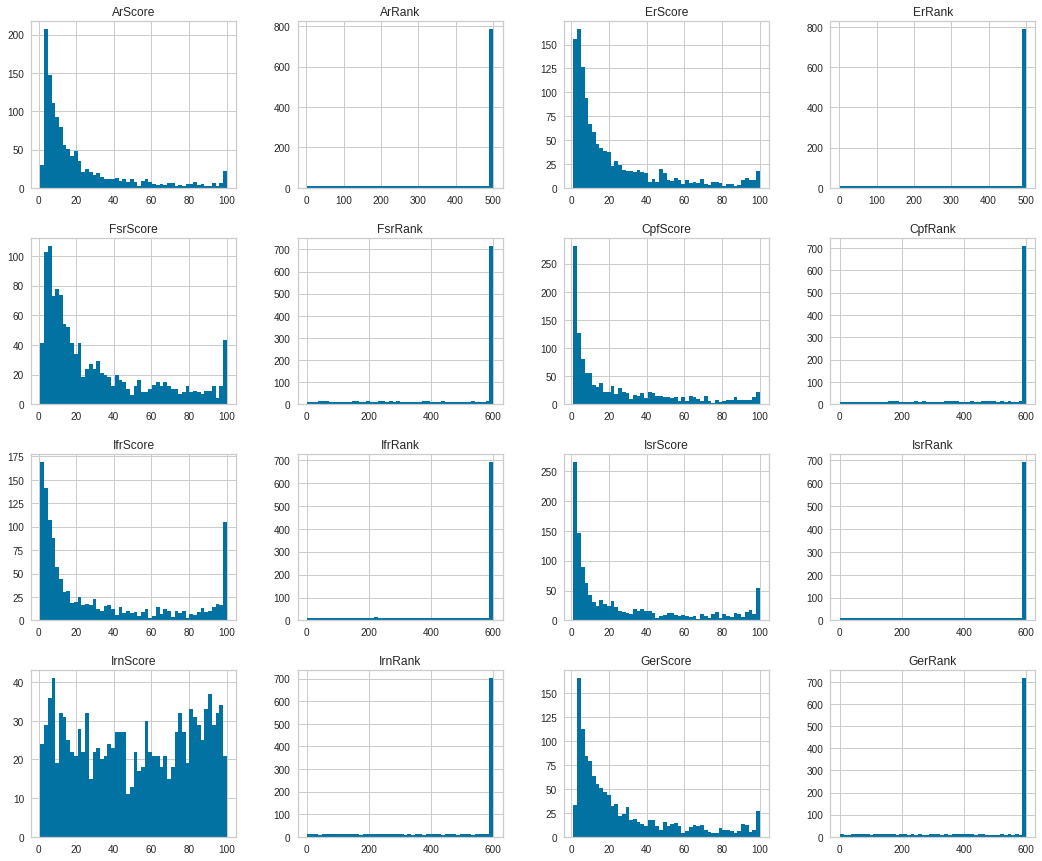

In [ ]:
df2.hist(bins=50, figsize=(18,15))
plt.show()

In [ ]:
df2.shape[1] # pega a última coluna

21

In [ ]:
x = df2.iloc[:, 0:-1]
y = df2["ScoreScaled"]

In [ ]:
from sklearn import preprocessing
# Institution,LocationCode,Location
le = preprocessing.LabelEncoder()
x['Institution']  = le.fit_transform(x['Institution'])
x['LocationCode']  = le.fit_transform(x['LocationCode'])
x['Location']  = le.fit_transform(x['Location'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
print(X_train.shape)

(935, 20)


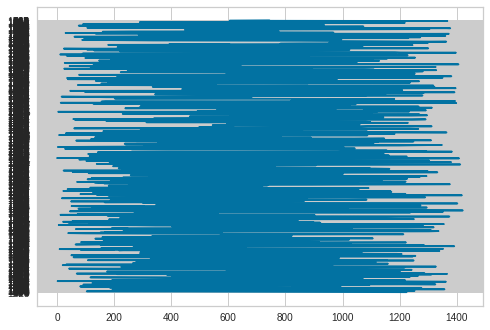

In [ ]:
plt.plot(X_train.iloc[:, 0])
plt.show()

In [ ]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

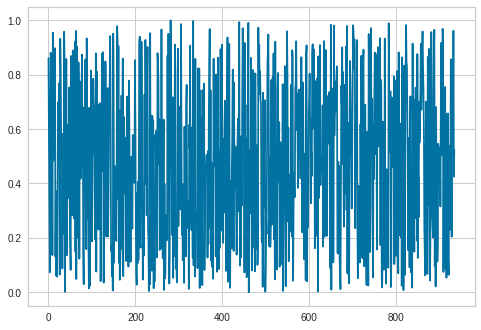

In [ ]:
plt.plot(X_train[:, 0])
plt.show()

In [ ]:
redutor = PCA(2)

In [ ]:
X_train = redutor.fit_transform(X_train)
print(X_train.shape)

(935, 2)


In [ ]:
X_test = redutor.transform(X_test)
print(X_test.shape)

(312, 2)


In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizador_k = KElbowVisualizer(KMeans(), k=(2, 15), metric='silhouette')

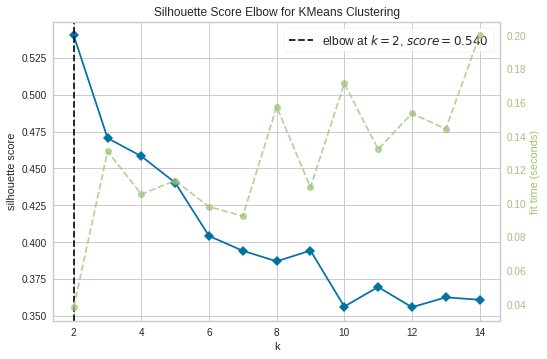

In [ ]:
visualizador_k.fit(X_train)
visualizador_k.show()

In [ ]:
km = KMeans(n_clusters=2)

rotulo = km.fit_predict(X_train)

In [ ]:
print(rotulo)

In [ ]:
centros = km.cluster_centers_

unico = np.unique(rotulo)

In [ ]:
# X_train = pd.DataFrame(X_train)
# X_train.columns('Rank','Institution','LocationCode','Location','ArScore','ArRank','ErScore','ErRank','FsrScore','FsrRank','CpfScore','CpfRank','IfrScore','IfrRank','IsrScore','IsrRank','IrnScore','IrnRank','GerScore','GerRank')

In [ ]:
# df2.plot(kind='scatter', x='ArScore', y='ScoreScaled', alpha=0.4, figsize=(10,7), cmap=plt.get_cmap('jet'), colorbar=True)
# plt.legend
# plt.show()